# M4-L1 Problem 1

In this problem, you will perform support vector classification on a linearly separable dataset. You will do so without using an SVM package 

That is, you will be solving the large margin linear classifier optimization problem:

$$
\min_{\boldsymbol{w}, b}\qquad \frac{1}{2}||\boldsymbol{w}||^2
$$

$$
\text{subject to:}\quad y_i(\boldsymbol{w}^T \boldsymbol{x}_i+b)\geq 1
$$


As described in lecture, you will convert the problem into a form compatible with the quadratic programming solver in the `cvxopt` package in Python:

$$
\min \quad \frac{1}{2}x^T P x + q^T x
$$

$$
\text{subject to:}\quad G x \preceq h; A x = b
$$

Your job in this notebook is to define `P`, `q`, `G`, and `h` from above.


Please install the `cvxopt` package. (You can do that in the notebook directly with `!pip install cvxopt`) Then run the next cell to make the necessary imports.


In [ ]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

def plot_boundary(x, y, w1, w2, b, e=0.1):
    x1min, x1max = min(x[:,0]), max(x[:,0])
    x2min, x2max = min(x[:,1]), max(x[:,1])
    
    xb = np.linspace(x1min,x1max)
    y_0 = 1/w2*(-b-w1*xb)
    y_1 = 1/w2*(1-b-w1*xb)
    y_m1 = 1/w2*(-1-b-w1*xb)
    
    cmap = ListedColormap(["purple","orange"])

    plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap)
    plt.plot(xb,y_0,'-',c='blue')
    plt.plot(xb,y_1,'--',c='green')
    plt.plot(xb,y_m1,'--',c='green')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis((x1min-e,x1max+e,x2min-e,x2max+e))

## Load the data

In [ ]:
x1 = np.array([0.0478, 1.4237, 0.2514, 0.2549, 0.3378, 0.5349, 0.7319, 0.7768,
       0.6593, 0.9807, 0.877 , 0.8321, 0.6524, 1.4231, 1.2814, 1.3021,
       1.1915, 1.0913, 1.4438, 0.0959, 0.0752, 0.1789, 0.2549, 0.324 ,
       0.4934, 0.5971, 0.6005, 0.718 , 0.5452, 0.2272, 0.7802, 0.9565,
       0.1028, 0.0579, 0.1927, 0.3862])

x2 = np.array([ 0.9555, -0.396 ,  0.8968,  0.7987,  0.7251,  0.5453,  0.5371,
        0.7088,  0.8028,  0.766 ,  0.439 ,  0.1733,  0.3082,  0.9213,
        0.6515,  0.3777,  0.1896, -0.1374,  0.112 ,  0.3368,  0.1569,
        0.2101,  0.3368,  0.2509,  0.1651,  0.0343, -0.1169, -0.2355,
       -0.3009, -0.3091, -0.3418, -0.3377, -0.3091, -0.0188,  0.0547, -0.3091])

y = np.array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

X = np.vstack([x1,x2]).T


## Quadratic Programming

Create the P, q, G, and h matrices as described in the lecture:
- `P` (3x3): Identity matrix, but with 0 instead of 1 for the bias (third) row/column
- `q` (3x1): Vector of zeros
- `G` (Nx3): Negative y multiplied element-wise by [`x1`, `x2`, `1`]
- `h` (Nx1): Vector of -1

Make sure the sizes of your matrices match the above. Use numpy arrays. These will be converted into `cvxopt` matrices later.

In [ ]:
# YOUR CODE GOES HERE
# Define P, q, G, h

print("P: ",P.shape)
print("q: ",q.shape)
print("G: ",G.shape)
print("h: ",h.shape)

P:  (3, 3)
q:  (3, 1)
G:  (36, 3)
h:  (36, 1)


## Using cvxopt for QP

Now we convert these arrays into `cvxopt` matrices and solve the quadratic programming problem. Then we get the weights `w1`, `w2`, and `b` and plot the decision boundary.

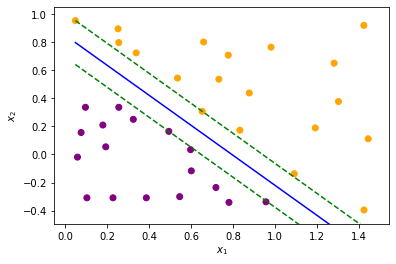

In [ ]:
z = solvers.qp(matrix(P),matrix(q),matrix(G),matrix(h))
w1 = z['x'][0]
w2 = z['x'][1]
b = z['x'][2]

plot_boundary(X, y, w1, w2, b)

## Using the SVM
Finally, we will generate a grid of (x1,x2) points and evaluate our support vector classifier on each of these points. Given the array `X_grid`, determine `y_grid`, the class of each point in `X_grid` according to the support vector machine you trained.

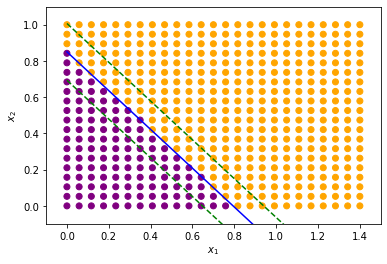

In [ ]:
x1vals = np.linspace(0,1.4,25)
x2vals = np.linspace(0,1,20)
x1s, x2s = np.meshgrid(x1vals, x2vals)
X_grid = np.vstack([x1s.flatten(),x2s.flatten()]).T

# YOUR CODE GOES HERE
# Get y_grid

plot_boundary(X_grid, y_grid, w1, w2, b)